In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#We are going to cluster our customers based on Annual Income and Spending Scores
X = dataset.iloc[:, [3, 4]].values

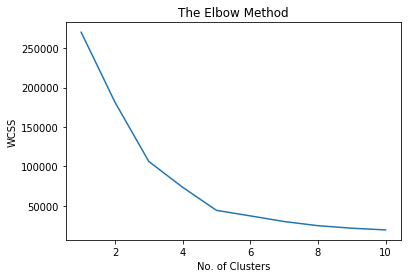

In [5]:
# Using elbow method to find max number of clusters
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=101 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Kmeans++ for choosing initial centroid not by random process
#### WCSS : Within Cluster Sum of Squares : For number of clusters we take elbow for WCSS 
#### which is sum squared distance of centroid with their points

In [6]:
# So based on above graph we chose our no. of clusters as 5
# Fitting k-means to the dataset
kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state=101)
y_kmeans= kmeans.fit_predict(X)

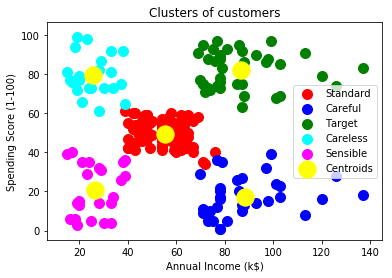

In [10]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c= 'red', label= 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()